# Tutorial de imágenes astronómicas: Introducción

Este tutorial tiene como intención familiarizarse con las herramientas de python necesarias para analizar imágenes astronómicas.

## 1) Paquetes necesarios

Los paquetes absolutamente necesarios son casi los mismos que se usan en métodos computacionales 1: numpy, matplotlib, pandas, scipy y sklearn. Las nuevas adiciones serán astropy y photutils. 

Desde un cuaderno de jupyter se puede invocar a la consola usando `!` al inicio de una línea:

In [1]:
!ls

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Para instalar paquetes de python se usa `pip`. Dependiendo de su sistema, puede estar bajo el nombre `pip3`. A continuación instalaremos los paquetes mencionados que usaremos a lo largo del curso:

In [2]:
!pip -q install numpy scipy matplotlib pandas "astropy[recommended]" photutils scikit-image

Siempre que no haya nada en rojo, quiere decir que los paquetes se instalaron correctamente. 

## 2) Imágenes .fits

### 2.1) Lectura de archivos y directorios en python

En la carpeta `data` hay dos archivos `.fits`. Cuando son pocos archivos, podríamos importar directamente `A.fits` y `B.fits` sin problema; pero más adelante, cuando estemos lidiando con muchas imágenes, conviene tener una manera de que python detecte las imágenes en una carpeta. 

Para esto usaremos el paquete `glob`.

In [3]:
from glob import glob

glob efectivamente sirve como un `ls`, pero dentro de python, y ligeramente más poderoso, porque nos retorna una lista con los nombres de archivo como strings, que podemos usar en python.

In [4]:
glob("*") # Todo lo que haya en carpeta

['Absolutos de la Gaussiana.png',
 'Corrimiento de las imagenes.png',
 'crosshair.png',
 'data',
 'Ejercicio 2 Perfil X.png',
 'Ejercicio 2 Perfil Y.png',
 'Ejercicio_1.png',
 'Estrella más brillante.png',
 'Histograma alineación.png',
 'Imagen Alienada.png',
 'Imagen Alienada2.png',
 'Imagen1.png',
 'Imagen1Ejercicio_1.png',
 'Imagen2Ejercicio_1.png',
 'introducción.ipynb',
 'Perfil X de la imagen 1.png',
 'Perfil X de la imagen 2.png',
 'Perfil Y de la imagen 1.png',
 'Perfil Y de la imagen 2.png',
 'Perfiles Gaussianos.png',
 'Perfiles.png',
 'Zoom_Imagenes.png']

Para escoger los archivos `.fits` que están en la carpeta `data`, usamos:

In [5]:
files = glob("data/*.fits") #Todo lo que sea .fits retornelo.
files

['data\\A.fits', 'data\\B.fits']

El paquete `astropy` tiene herramientas para leer información de estos archivos `.fits`. Para eso importamos:

In [6]:
from astropy.io import fits

En jupyter podemos obtener información de un objeto preguntando por él. Veamos la descripción del módulo que acabamos de importar:

In [7]:
fits?

Para cada una de nuestras imágenes conviene ver la información general de la imagen, que se obtiene con la función `fits.info`.

In [8]:
for file in files:
    print(fits.info(file))

Filename: data\A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   
None
Filename: data\B.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   
None


Las tres funciones que veremos (info,getheader,getdata) aceptan la ruta del archivo como string:

In [9]:
fits.info("data/A.fits")

Filename: data/A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   


### 2.2) Headers

Las imágenes FITS contienen, además de datos numéricos, un "header" con información adicional que puede ser útil para su uso científico. Podemos ver el header así:

In [10]:
fits.getheader("data/A.fits")

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                  -32  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  318  /                                               
NAXIS2  =                  509  /                                               
OBJECT  = 'M-92 V  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'im010.imh'           /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           1.064900E4  /  DATA MAX                                     
IRAF-MIN=           4.810000E2  /  DATA MIN                                     
IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
IRAFTYPE= 'REAL    '        

podemos obtener todos los headers de nuestras imágenes:

In [11]:
headers = [fits.getheader(f) for f in files]

Los atributos del header se acceden como si se trataran de diccionarios de python:

In [12]:
headers[0]["OBJECT"]

'M-92 V'

In [13]:
headers[0]["EXPTIME"]

60

In [14]:
headers[0]["DATE-OBS"]

'01/09/87'

### 2.3) datos

Los datos de la imagen se obtienen con `fits.getdata`, y serán guardados en arrays de numpy bidimensionales.

Por esto importamos numpy, antes que nada.

In [15]:
import numpy as np
np.set_printoptions(linewidth=120) # para que se vea

y ahora sí importamos las imágenes como tal:

In [16]:
images = [fits.getdata(f) for f in files]

In [17]:
images[0]

array([[37.184605, 47.360104, 49.133606, ..., 40.524715, 39.21413 , 37.51868 ],
       [41.218204, 47.555954, 48.699158, ..., 43.074856, 54.495537, 50.512478],
       [40.18866 , 42.581043, 53.572693, ..., 44.766705, 37.798122, 59.58666 ],
       ...,
       [47.135468, 40.28973 , 52.449577, ..., 35.836357, 42.49507 , 54.60417 ],
       [44.669   , 39.22278 , 46.34222 , ..., 34.451347, 45.486805, 44.37549 ],
       [38.97707 , 46.36016 , 40.002304, ..., 53.20716 , 54.100876, 58.340065]], dtype=float32)

Con esto podemos hacer operaciones sobre los datos, como se haría con cualquier otro array de numpy.

In [18]:
images[0].max()

10160.793

In [19]:
images[0].min()

-7.8015227

In [20]:
images[0].mean()

46.84091

In [21]:
np.median(images[0])

42.498184

In [22]:
np.std(images[0])

93.601685

### 2.4) Visualización con matplotlib

In [23]:
import matplotlib.pyplot as plt

Usaremos la función imshow:

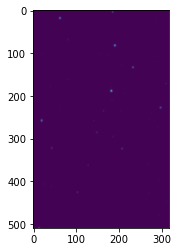

In [24]:
plt.imshow(images[0])

No se ve demasiado, y los colores son artificiales. Podemos cambiar el tamaño de la figura y el mapa de color utilizado para representar los datos.
También recomiendo cambiar el origen de los ejes a "lower".

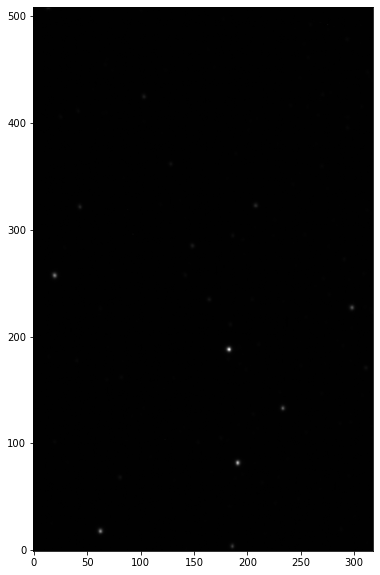

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(images[0],cmap="gray",origin="lower")

Estos cambios se pueden hacer permanentes de esta forma:

In [26]:
#plt.rcParams["figure.figsize"] = (10,10) # no recomendado
plt.rcParams["image.cmap"] = "gray" # pueden ver más colormaps aquí: https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.rcParams["image.origin"] = "lower"

Para visualizar mejor la imagen se limitan los colores con los argumentos `vmin` y `vmax`.

También podemos darnos una idea de qué valores de cuentas estamos viendo con una barra de color.

Juegue con los valores de vmin y vmax hasta poder ver las estrellas del fondo, y quizás un poco del ruido del cielo:

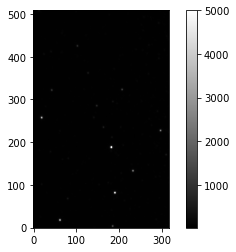

In [27]:
p = plt.imshow(images[0],vmin=10,vmax=5000)
plt.colorbar(p)

Uno puede tantearlos imagen a imagen, pero claramente hay maneras más elegantes de hacerlo. 
Podemos definir una función que llame a `plt.imshow`, pero que automáticamente nos ponga el `vmin` y `vmax` a los cuantiles 1% y 99% de los datos de la imagen:

In [28]:
def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

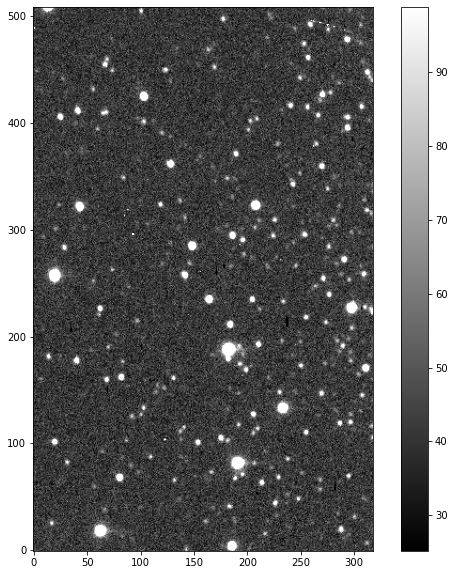

In [29]:
plt.figure(figsize=(10,10))
p = quantile_imshow(images[0])
plt.colorbar(p)
plt.savefig("Imagen1.png")

Lo cual nos permite ver mucho más de la imagen que sólo las estrellas brillantes.

Esto ya nos dice algo acerca de las imágenes fotométricas: 
* Usualmente el cielo es muy poco brillante, y esto compone la mayoría de los pixeles de la imagen
* Hay unos pocos puntos ---las estrellas--- muy brillantes.

Esto lo podemos comprobar haciendo un histograma de los valores de los pixeles de la imagen. 
Para esto necesitamos primero aplanar (temporalmente) la imagen de un array 2D:

In [30]:
images[0].shape

(509, 318)

a un array 1D:

In [31]:
flattened = images[0].ravel()
flattened.shape #Columna fila

(161862,)

Ahora podemos hacer el histograma. Modifique el argumento `bins` para que en lugar de que el histograma se vea desde el mínimo a máximo de los datos, use el vmin y el vmax que encontró arriba para la imagen.

Text(0, 0.5, 'Frecuencia')

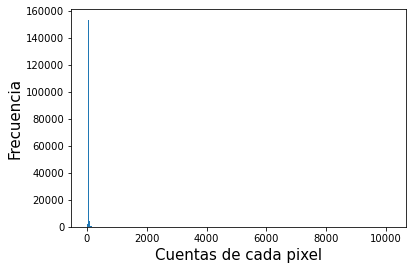

In [32]:
plt.hist(flattened,bins=np.linspace(flattened.min(),flattened.max(),300))
plt.xlabel("Cuentas de cada pixel",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)

Podemos usar una escala log-log para poder apreciar todos los datos, sean cielo o estrellas:

Text(0, 0.5, 'Frecuencia')

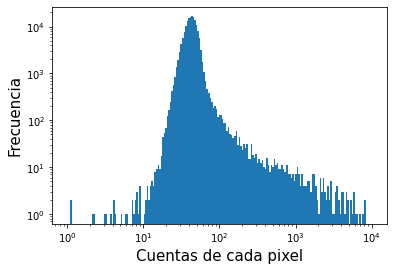

In [33]:
plt.hist(images[0].ravel(),bins=np.logspace(0,4,200),log=True); # Escalar bins y la imagen
plt.xscale("log")
plt.xlabel("Cuentas de cada pixel",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)

### Ejercicio 1

> Defina otra función, llamada `my_imshow`, que ponga automáticamente los `vmin` y `vmax`, pero esta vez a un número dado de desviaciones estándar del promedio de la imagen.
> Es decir, dado $n$,
> $$v_{min}= \mu - n  \sigma$$
> $$v_{max}= \mu + n  \sigma$$
> El `n` por defecto podría ser 5.

Nota: ya que tenemos puntos "atípicos" (las estrellas) la media y la desviación estándar se ven gravemente afectadas, y pueden no ser la mejor idea.
Algunas alternativas son:

* Lo clásico en astronomía: usar "sigma clipping", para lo cual existe el módulo `astropy.stats.sigma_clipping`, y su función `sigma_clipped_stats`.
* La media (`np.median`) como estimador de localización, y la MAD como estimador de escala (`scipy.stats.median_abs_deviation`).
* Estimadores robustos un poco más elegantes, disponibles en `astropy.stats.biweight.biweight_location` y `astropy.stats.biweight.biweight_scale`.

Yo la verdad me quedo con mis cuantiles la mayoría de las veces.

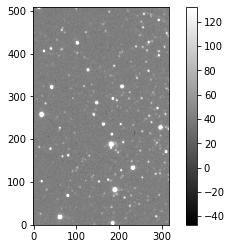

In [34]:
from astropy.stats import biweight_location, biweight_scale
from astropy.stats import sigma_clipped_stats
from scipy.stats import median_abs_deviation

# respuesta
def my_imshow(image, n):
    # Utilizar sigma clipping para calcular la media y la desviación estándar     
    mean, median, std = sigma_clipped_stats(image)
    
    # Calcular vmin y vmax basados en el número de desviaciones estándar (n)
    vmin = mean - n * std
    vmax = mean + n * std
    
    # Mostrar la imagen con los valores ajustados
    
    P= plt.imshow(image, vmin=vmin, vmax=vmax, cmap='gray')
    A=plt.colorbar()
    return P
# Ejemplo de uso:
# Supongamos que tienes una matriz de píxeles llamada 'data'
my_imshow(images[0],12)

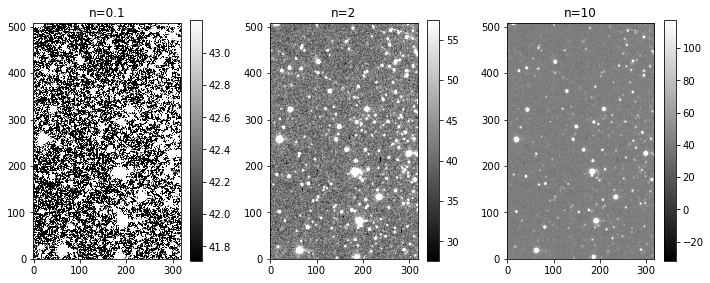

In [35]:
fig,ax =plt.subplots(ncols=3,figsize=(10,4))
ns=[0.1,2,10]
for i in range(3):
    plt.sca(ax[i])
    my_imshow(images[0],ns[i])
    plt.title("n="+str(ns[i]))
plt.tight_layout()
plt.savefig("Imagen1Ejercicio_1.png")

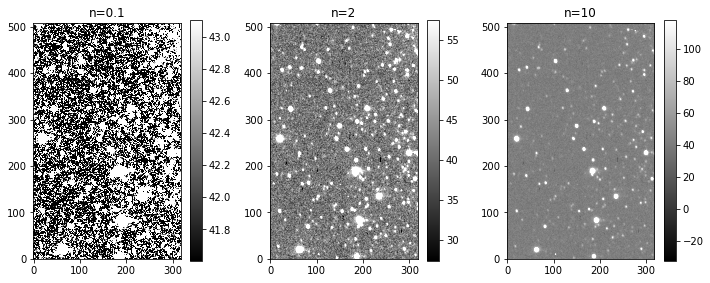

In [36]:
fig,ax =plt.subplots(ncols=3,figsize=(10,4))
ns=[0.1,2,10]
for i in range(3):
    plt.sca(ax[i])
    my_imshow(images[1],ns[i])
    plt.title("n="+str(ns[i]))
plt.tight_layout()
plt.savefig("Imagen2Ejercicio_1.png")

### 2.5) subplots y zoom

Podemos ver las imágenes al tiempo usando subplots:

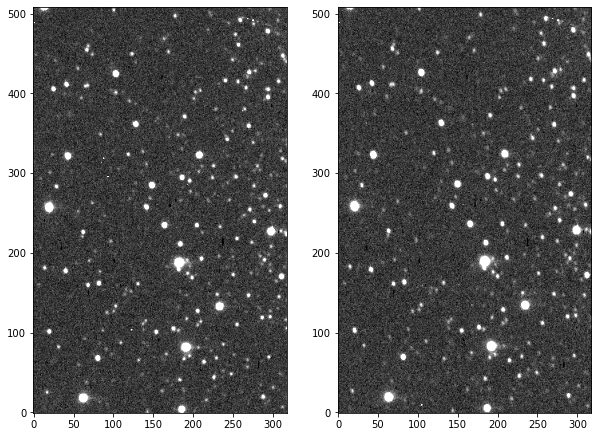

In [37]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))

plt.sca(ax[0]) # sca: Set Current Axis
quantile_imshow(images[0])

plt.sca(ax[1]) # sca: Set Current Axis
quantile_imshow(images[1])

A primera vista son completamente iguales. Podemos ver un poco más de cerca usando slicing. 

Seleccionemos esa primera estrella brillante en la esquina inferior. Como primer paso, seleccionemos los pixeles de 0 a 100 en x y en y:

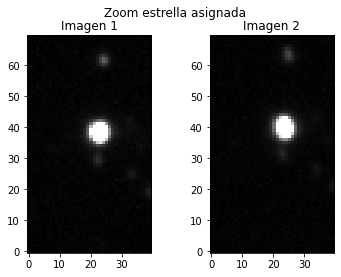

In [38]:
fig,ax = plt.subplots(ncols=2)
fig.suptitle('Zoom estrella asignada')
for i,image in enumerate(images):
    plt.sca(ax[i])
    quantile_imshow(image[150:220,160:200]) #(y,x)
    plt.title("Imagen "+str(i+1))
plt.savefig("Zoom_Imagenes.png")

La estrella parece estar en el pixel 60,20, más o menos. Pero algo para tener en cuenta es que en numpy el orden de los ejes es `[y,x]`.
Entonces, si queremos ver a detalle esa estrella, queremos el slice `[y=10:30, x=50:70]`

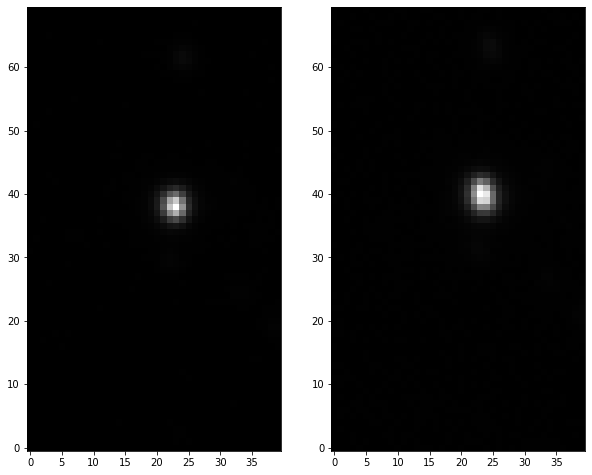

In [39]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))

for i,image in enumerate(images):
    plt.sca(ax[i])
    plt.imshow(image[150:220,160:200]) #Configurado para mi estrella.

Podemos observar que la estrella está ligeramente corrida. Dado que las imágenes fueron tomadas a tres minutos la una de la otra:

In [40]:
for h in headers:
    print(h["DATE-OBS"]+h["UT"])

01/09/87 3:30:24.00
01/09/87 3:33:18.00


Es razonable pensar que es un efecto del telescopio, no de la estrella. Esto también se puede comprobar porque todas las estrellas estarían corridas de la misma forma.

Podemos ayudarnos poniendo un "crosshair" en la imagen, con las siguientes dos funciones de matplotlib:

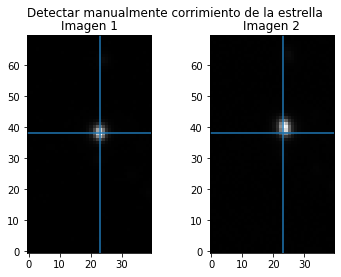

In [41]:
fig,ax = plt.subplots(ncols=2)
fig.suptitle('Detectar manualmente corrimiento de la estrella')
for i,image in enumerate(images):
    plt.sca(ax[i])
    plt.imshow(image[150:220,160:200])
    plt.axvline(23.0) # axis vertical line
    plt.axhline(38.0) # axis horizontal line
    plt.title("Imagen "+str(i+1))
plt.savefig("crosshair.png")

In [42]:
image[150:220,160:200].sum(axis=0) #Cero es vertical Uno es horizontal

array([ 2907.1282,  2951.193 ,  2871.893 ,  3001.1453,  2930.9412,  3087.091 ,  2966.3557,  2984.4702,  3128.108 ,
        3036.8738,  3047.085 ,  3081.9998,  2995.285 ,  3065.7458,  3159.336 ,  3120.4128,  3322.9485,  3414.6543,
        3711.6978,  4362.585 ,  6145.9976, 10797.492 , 22757.92  , 37317.492 , 34460.    , 19462.428 ,  9811.706 ,
        5855.7705,  4302.3315,  3671.7393,  3517.9373,  3356.7327,  3512.782 ,  3651.7202,  3645.8994,  3382.9094,
        3324.1985,  3292.4075,  3332.7498,  3418.62  ], dtype=float32)

O también sumando la imagen en x y en y, y comparando los picos que representa la estrella:

In [43]:
sum_y = [image[150:220,160:200].sum(axis=0) for image in images]
sum_x = [image[150:220,160:200].sum(axis=1)for image in images]

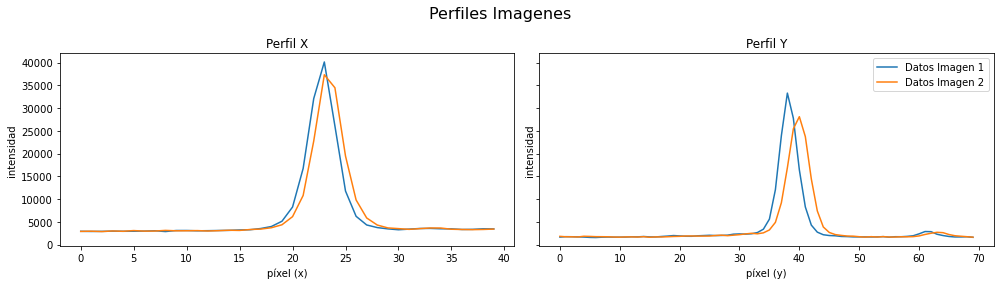

<Figure size 432x288 with 0 Axes>

In [44]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)
fig.suptitle('Perfiles Imagenes', fontsize=16)

def plot_profile(ax, data, xlabel, ylabel, title):
    ax.plot(data[0],label="Datos Imagen 1")
    ax.plot(data[1],label="Datos Imagen 2")
    #ax.plot(data[1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
# Subplot 1: Perfil X
plot_profile(ax[0], sum_y, "píxel (x)", "intensidad", "Perfil X")
# Subplot 2: Perfil Y
plot_profile(ax[1], sum_x, "píxel (y)", "intensidad", "Perfil Y")
# Ajusta el diseño y muestra el gráfico
plt.tight_layout()
plt.legend()
plt.show()

plt.savefig("Perfiles.png")

# Ajustes de los perfiles

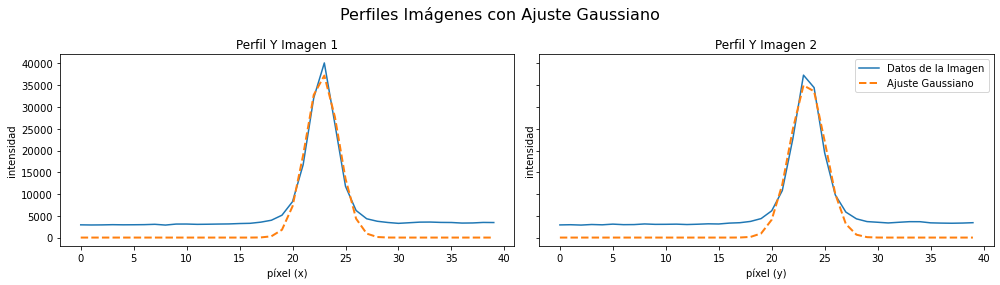

<Figure size 432x288 with 0 Axes>

In [45]:
#Ejemplo de que el ajuste gaussiano no es totalmente útil.
from scipy.optimize import curve_fit
# Definir la función gaussiana
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / (2 * stddev))**2)
# Datos de ejemplo para las imágenes 1 y 2
x_values = np.arange(len(sum_y[0]))
y_values_img1 = sum_y[0]
y_values_img2 = sum_y[1]
# Ajuste gaussiano utilizando curve_fit
params_img1, _ = curve_fit(gaussian, x_values, y_values_img1, p0=[1, np.argmax(y_values_img1), 1])
params_img2, _ = curve_fit(gaussian, x_values, y_values_img2, p0=[1, np.argmax(y_values_img2), 1])
# Crear figuras y ejes para los subgráficos
fig, ax = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)
fig.suptitle('Perfiles Imágenes con Ajuste Gaussiano', fontsize=16)
# Función para graficar los perfiles con ajuste gaussiano
def plot_profile_with_fit(ax, x, y, params, xlabel, ylabel, title):
    ax.plot(x, y, label="Datos de la Imagen")
    ax.plot(x, gaussian(x, *params), label="Ajuste Gaussiano", linestyle='--', linewidth=2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Subplot 1: Imagen 1
plot_profile_with_fit(ax[0], x_values, y_values_img1, params_img1, "píxel (x)", "intensidad", "Perfil Y Imagen 1")
# Subplot 2: Imagen 2
plot_profile_with_fit(ax[1], x_values, y_values_img2, params_img2, "píxel (y)", "intensidad", "Perfil Y Imagen 2")

plt.tight_layout()
plt.legend()
plt.show()
plt.savefig("Perfiles Gaussianos.png")

In [46]:
from scipy.stats import norm
from scipy.special import voigt_profile

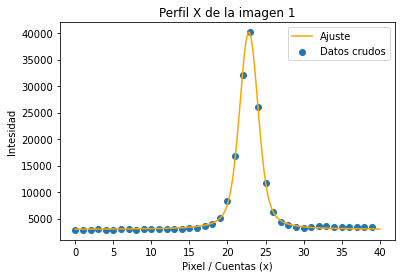

In [47]:
#Primero definir la función voigt_profile
def voigt(x,c,s1,s2,A,b):
    return b+A*voigt_profile(x-c,s1,s2)

#Imagen 1 
#Graficar el perfil X
#Para graficar el ajuste:
pixel_y0=np.arange(len(sum_y[0])) # Valor máximo de los pixeles de Perfil X
plt.scatter(pixel_y0,sum_y[0], label= "Datos crudos")

#Parametros del Ajuste
p0=[22,5,5,40000,700] 
#Ajuste
paramy0,incey0=curve_fit(voigt,pixel_y0,sum_y[0],p0=p0)
#print(paramy0,incey0)
#Listas para el ajuste
pixel_x0=np.arange(len(sum_x[0]))
x_data_fit=np.linspace(0,len(sum_y[0]),1000)
#Graficar el ajuste
plt.plot(x_data_fit,voigt(x_data_fit,*paramy0), color="orange", label= "Ajuste")
plt.title("Perfil X de la imagen 1")
plt.ylabel("Intesidad")
plt.xlabel("Pixel / Cuentas (x)")
plt.legend()

plt.savefig("Perfil X de la imagen 1.png")

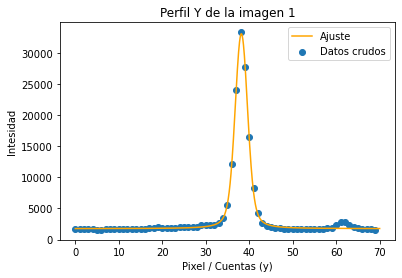

In [48]:
#Imagen 1
#Graficar el perfil de y
pixel_x0=np.arange(len(sum_x[0]))
plt.scatter(pixel_x0,sum_x[0],label= "Datos crudos")
p01=[30,5,5,40000,2500]
paramx0,incex0=curve_fit(voigt,pixel_x0,sum_x[0],p0=p01)
pixel_y0=np.arange(len(sum_x[0]))
y_data_fit=np.linspace(0,len(sum_x[0]),1000)
plt.plot(y_data_fit,voigt(y_data_fit,*paramx0), color="orange",label= "Ajuste")
plt.title("Perfil Y de la imagen 1")
plt.ylabel("Intesidad")
plt.xlabel("Pixel / Cuentas (y)")
plt.legend()
plt.savefig("Perfil Y de la imagen 1.png")

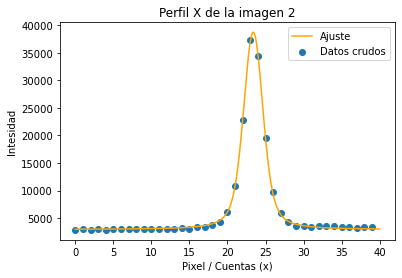

In [49]:
#Imagen 2
#Graficar el perfil de x
pixel_y1=np.arange(len(sum_y[1]))
plt.scatter(pixel_y1,sum_y[1],label= "Datos crudos")
p0=[20,5,5,35000,1500]
paramy1,incey1=curve_fit(voigt,pixel_y1,sum_y[1],p0=p0)
pixel_x1=np.arange(len(sum_x[1]))
x_data_fit=np.linspace(0,len(sum_y[1]),1000)
plt.plot(x_data_fit,voigt(x_data_fit,*paramy1), color="orange",label= "Ajuste")
plt.title("Perfil X de la imagen 2")
plt.ylabel("Intesidad")
plt.xlabel("Pixel / Cuentas (x)")
plt.legend()
plt.savefig("Perfil X de la imagen 2.png")

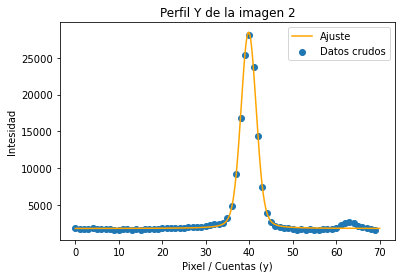

In [50]:
#Imagen 2
#Graficar el perfil de y
pixel_x1=np.arange(len(sum_x[1]))
plt.scatter(pixel_x1,sum_x[1],label= "Datos crudos")
p0=[20,5,5,35000,1500]
paramx1,incey1=curve_fit(voigt,pixel_x1,sum_x[1],p0=p0)
pixel_x1=np.arange(len(sum_x[1]))
x_data_fit=np.linspace(0,len(sum_x[1]),1000)
plt.plot(x_data_fit,voigt(x_data_fit,*paramx1), color="orange",label= "Ajuste")
plt.title("Perfil Y de la imagen 2")
plt.ylabel("Intesidad")
plt.xlabel("Pixel / Cuentas (y)")
plt.legend()
plt.savefig("Perfil Y de la imagen 2.png")

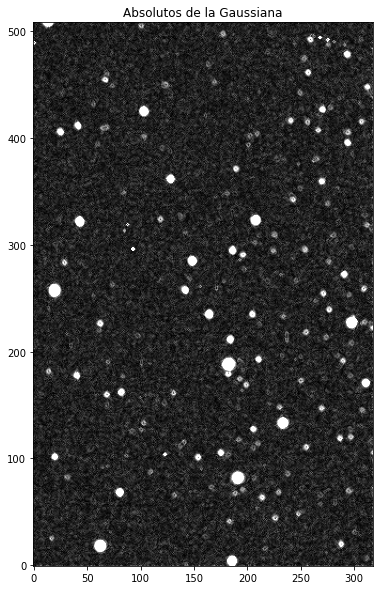

In [51]:
plt.figure(figsize=(10,10)); quantile_imshow(np.hypot(*np.gradient(images[0]))) #Va a generar un hueco, en el pico, debido
#a los absolutos de la gaussiana, genera una imagen con un hueco.
plt.title("Absolutos de la Gaussiana")
plt.savefig("Absolutos de la Gaussiana.png")

repita el proceso anterior, de hacer zoom y mirar las sumas parciales, pero para la estrella más brillante de la imagen.

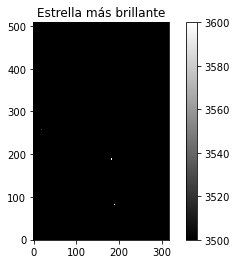

In [52]:
#Notese que la estrella que me asignaron es la más brillante.
p = plt.imshow(images[0],vmin=3500,vmax=3600)
plt.colorbar(p)
plt.title("Estrella más brillante")
plt.savefig("Estrella más brillante.png")

### 2.6) Operaciones entre imágenes 

Más adelante se verán maneras más avanzadas de detectar movimiento, rotación, cambios de zoom y hasta perspectiva entre imágenes. Por ahora quisiéramos simplemente aproximar este movimiento como un vector de desplazamiento en pixeles.

Para eso restaremos ambas imágenes. Si las imágenes estuvieran bien alineadas, esta resta debería ser ruido.

Si no lo están, como en este caso, se ve algo como esto:

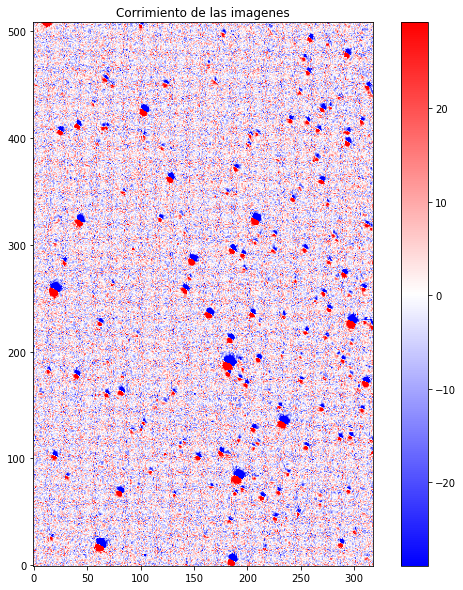

In [53]:
plt.figure(figsize=(10,10))
p = quantile_imshow(images[0] - images[1],cmap="bwr")
plt.colorbar(p)
plt.title("Corrimiento de las imagenes")
plt.savefig("Corrimiento de las imagenes.png")

Así podemos darnos cuenta que todas las estrellas están movidas un poco en x y un poco en y.

### Ejercicio 2 (o tarea, depende de cómo estemos)

> Encuentre el desplazamiento en píxeles en x y y en y entre las dos imágenes.

Esto se puede hacer de muchas maneras. 

* Puede elegir varias estrellas brillantes, hacer mucho zoom, y tratar de sacar el punto máximo a ojo, y promediar sus resultados.

* Puede sumar en x y en y, como vimos antes (con varias estrellas o con toda la imagen) e intentar optimizar el corrimiento en cada eje por separado; es decir, correr una de las curvas en el eje x hasta que los picos se superpongan.

* Si va a transformar la imagen entera, puede usar `scipy.ndimage.shift`, que recibe una imagen y un vector de corrimiento. Podría entonces restar ambas imágenes, sumar los cuadrados, y minimizar con `scipy.optimize.minimize`.

Lo más adecuado en astronomía sería usar las coordenadas (o centroides) de las estrellas, pero eso es algo que aprenderemos más adelante.

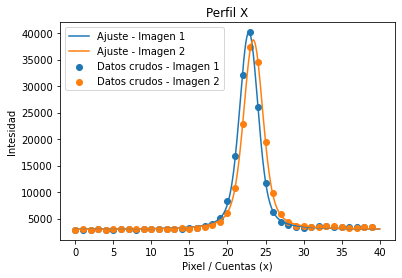

In [54]:
#Graficar el perfil X
#Imagen 1 
#Para graficar el ajuste:
pixel_y0=np.arange(len(sum_y[0])) # Valor máximo de los pixeles de Perfil X
plt.scatter(pixel_y0,sum_y[0], label= "Datos crudos - Imagen 1")
#Parametros del Ajuste
p0=[22,5,5,40000,700] 
#Ajuste
paramy0,incey0=curve_fit(voigt,pixel_y0,sum_y[0],p0=p0)
#print(paramy0,incey0)
#Listas para el ajuste
pixel_x0=np.arange(len(sum_x[0]))
x_data_fit=np.linspace(0,len(sum_y[0]),1000)
#Graficar el ajuste
plt.plot(x_data_fit,voigt(x_data_fit,*paramy0), label= "Ajuste - Imagen 1")
plt.title("Perfil X de la imagen 1")
plt.ylabel("Intesidad")
plt.xlabel("Pixel / Cuentas (x)")
plt.legend() 
#Imagen 2
#Graficar el perfil de x
pixel_y1=np.arange(len(sum_y[1]))
plt.scatter(pixel_y1,sum_y[1],label= "Datos crudos - Imagen 2")
p0=[20,5,5,35000,1500]
paramy1,incey1=curve_fit(voigt,pixel_y1,sum_y[1],p0=p0)
pixel_x1=np.arange(len(sum_x[1]))
x_data_fit=np.linspace(0,len(sum_y[1]),1000)
plt.plot(x_data_fit,voigt(x_data_fit,*paramy1),label= "Ajuste - Imagen 2")
plt.title("Perfil X")
plt.ylabel("Intesidad")
plt.xlabel("Pixel / Cuentas (x)")
plt.legend()
plt.savefig("Ejercicio 2 Perfil X.png")

In [55]:
#Desplazamiento
maximo_Img1x=np.max(voigt(x_data_fit,*paramy0))
maximo_Img2x=np.max(voigt(x_data_fit,*paramy1))
Delta_X1= maximo_Img1x -maximo_Img2x
Delta_X1

1449.3386993212625

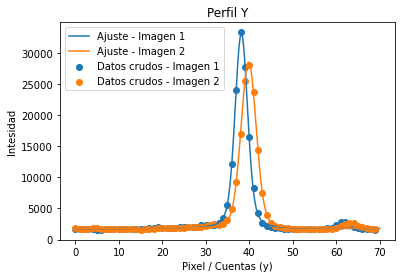

In [56]:
#Graficar el perfil de y
#Imagen 1
pixel_x0=np.arange(len(sum_x[0]))
plt.scatter(pixel_x0,sum_x[0],label= "Datos crudos - Imagen 1")
p01=[30,5,5,40000,2500]
paramx0,incex0=curve_fit(voigt,pixel_x0,sum_x[0],p0=p01)
pixel_y0=np.arange(len(sum_x[0]))
y_data_fit=np.linspace(0,len(sum_x[0]),1000)
plt.plot(y_data_fit,voigt(y_data_fit,*paramx0),label= "Ajuste - Imagen 1")
#Imagen 2
#Graficar el perfil de y
pixel_x1=np.arange(len(sum_x[1]))
plt.scatter(pixel_x1,sum_x[1],label= "Datos crudos - Imagen 2")
p0=[20,5,5,35000,1500]
paramx1,incey1=curve_fit(voigt,pixel_x1,sum_x[1],p0=p0)
pixel_x1=np.arange(len(sum_x[1]))
x_data_fit=np.linspace(0,len(sum_x[1]),1000)
plt.plot(x_data_fit,voigt(y_data_fit,*paramx1),label= "Ajuste - Imagen 2")
plt.title("Perfil Y")
plt.ylabel("Intesidad")
plt.xlabel("Pixel / Cuentas (y)")
plt.legend()
plt.savefig("Ejercicio 2 Perfil Y.png")

In [57]:
#Desplazamiento
maximo_Img1y=np.max(voigt(y_data_fit,*paramx0))
maximo_Img2y=np.max(voigt(y_data_fit,*paramx1))
Delta_Y1= maximo_Img1y -maximo_Img2y
Delta_Y1

4567.788136507061

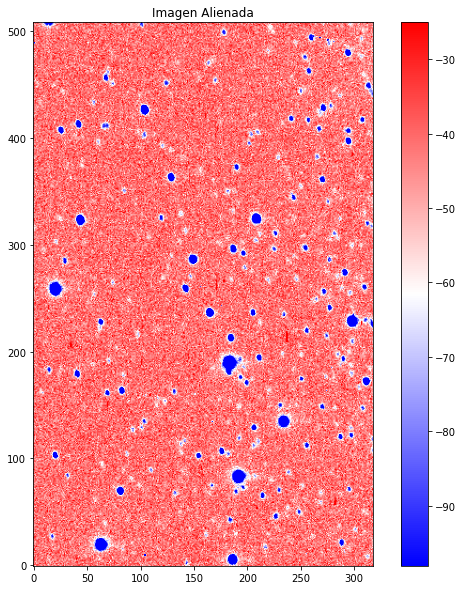

In [58]:
import scipy
from scipy.ndimage import shift

# Asumiendo que 'images' es tu conjunto de imágenes y Delta_X, Delta_Y son los desplazamientos
shifted_image = shift(images[0], (Delta_X1, Delta_Y1))
plt.figure(figsize=(10,10))
p = quantile_imshow(shifted_image - images[1],cmap="bwr")
plt.colorbar(p)
plt.title("Imagen Alienada")
plt.savefig("Imagen Alienada.png")

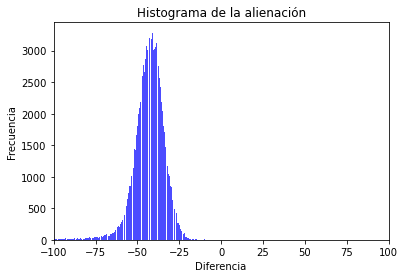

<Figure size 432x288 with 0 Axes>

In [59]:
difference = shifted_image - images[1]

# Crear el histograma
plt.hist(difference.flatten(), bins='auto', color='blue', alpha=0.7, rwidth=0.85)

# Personalizar el gráfico
plt.title('Histograma de la alienación')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xlim(-100,100)
# Mostrar el histograma
plt.show()
plt.savefig("Histograma alineación.png")